文本分类，把一句话分类为 消极 和 积极。

In [0]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

In [0]:
dataset, info = tfds.load('imdb_reviews/subwords8k',
                          with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [0]:
encoder = info.features['text'].encoder

In [41]:
# 词汇表大小
print(encoder.vocab_size)

8185


In [44]:
# 词汇表的词
print(encoder.decode([1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                      11, 12, 13, 14, 15, 16, 17, 18, 19, 20]))

the , . a and of to s is brin I that this it  />< />was The as 


In [0]:
sample_string = 'I am a sentence.'

In [46]:
encoded_string = encoder.encode(sample_string)
encoded_string

[12, 258, 4, 7745, 7975]

In [47]:
original_string = encoder.decode(encoded_string)
original_string

'I am a sentence.'

In [48]:
for index in encoded_string:
    print('{} --> {}'.format(index, encoder.decode([index])))

12 --> I 
258 --> am 
4 --> a 
7745 --> sentence
7975 --> .


### Prepare the data

In [0]:
train_batches = train_dataset.shuffle(10000).padded_batch(64, padded_shapes=([None],[]))
test_batches = test_dataset.shuffle(10000).padded_batch(64, padded_shapes=([None],[]))

In [51]:
model = keras.Sequential([
    keras.layers.Embedding(encoder.vocab_size, 64),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [53]:
history = model.fit(train_batches, epochs=10,
                    validation_data=test_batches,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 56s 143ms/step - loss: 0.6605 - accuracy: 0.5425 - val_loss: 0.5339 - val_accuracy: 0.7021
Epoch 2/10
391/391 [==============================] - 56s 143ms/step - loss: 0.4043 - accuracy: 0.8096 - val_loss: 0.3552 - val_accuracy: 0.8490
Epoch 3/10
391/391 [==============================] - 56s 142ms/step - loss: 0.2715 - accuracy: 0.8901 - val_loss: 0.3181 - val_accuracy: 0.8724
Epoch 4/10
391/391 [==============================] - 56s 143ms/step - loss: 0.2290 - accuracy: 0.9119 - val_loss: 0.3556 - val_accuracy: 0.8281
Epoch 5/10
391/391 [==============================] - 56s 143ms/step - loss: 0.1974 - accuracy: 0.9260 - val_loss: 0.3352 - val_accuracy: 0.8719
Epoch 6/10
391/391 [==============================] - 56s 143ms/step - loss: 0.1695 - accuracy: 0.9394 - val_loss: 0.3679 - val_accuracy: 0.8578
Epoch 7/10
391/391 [==============================] - 56s 142ms/step - loss: 0.1601 - accuracy: 0.9435 - val_loss: 0.3570 - val_ac

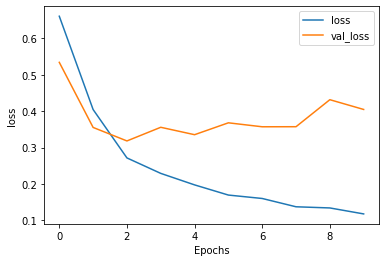

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], '')
plt.xlabel("Epochs")
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.show()


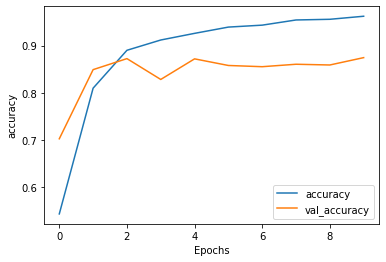

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], '')
plt.xlabel("Epochs")
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [0]:
model.save('colab_4-13-10-11.h5')
